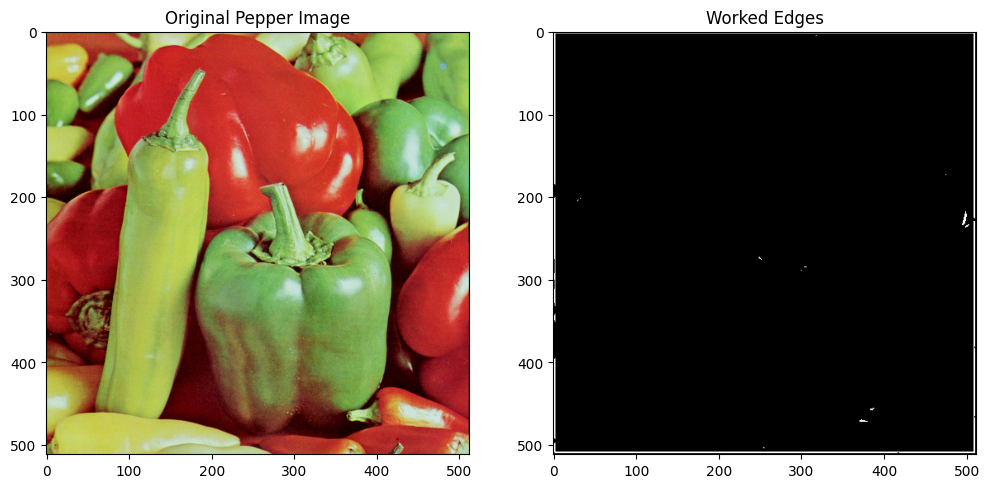

In [3]:
# Load standard libraries for numerical methods and plotting.
# This same block will start almost every assignment in PHYS 481.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
from numba import jit
from PIL import Image

%matplotlib inline

# Q3c

def convolve_2d(img, kernel):
    """
    Apply a 2D convolution filter to an image. 

    Args: 
        img (numpy.ndarray): The input image to be convolved.
        kernel (numpy.ndarray): The convolution kernel to be applied to the image.

    Returns:
        convolved_img (numpy.ndarray): The convolved image.
    """
    m1, n1 = kernel.shape
    m, n, _ = img.shape
    smoothed_img = np.zeros_like(img)
    
    m_half, n_half = m1 // 2, n1 // 2
    
    for i in range(m_half, m - m_half):
        for j in range(n_half, n - n_half):
            for c in range(img.shape[2]):  # Iterate over color channels (e.g., R, G, B)
                smoothed_img[i, j, c] = np.sum(img[i-m_half:i+m_half+1, j-n_half:j+n_half+1, c] * kernel)
    
    return smoothed_img


def plot_images_worked(original, worked_edges):
    """
    Plot the original and smoothed images.
    
    Args:
        original (numpy.ndarray): The original image, smoothed (numpy.ndarray): The smoothed image
        smoothed (numpy.ndarray): The smoothed image
    
    Returns:
        None
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Pepper Image')

    plt.subplot(1, 2, 2)
    plt.imshow(worked_edges,cmap='gray')
    plt.title('Worked Edges')
    plt.show()


def grad(channel):
    """
    Calculate the gradient magnitude of an image channel using the Sobel operator.

    Args: 
        channel (numpy.ndarray): The input image channel to calculate the gradient magnitude of.

    Returns:
        gradient (numpy.ndarray): The gradient magnitude of the input image channel.

    """

    # Define the Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.transpose(sobel_x)

    # Create arrays to store the gradients in the x and y directions
    grad_x = np.zeros_like(channel)
    grad_y = np.zeros_like(channel)
    
    for i in range(1, channel.shape[0] - 1):
        for j in range(1, channel.shape[1] - 1):
            grad_x[i, j] = np.sum(channel[i-1:i+2, j-1:j+2] * sobel_x)
            grad_y[i, j] = np.sum(channel[i-1:i+2, j-1:j+2] * sobel_y)
    
    gradient = np.sqrt(grad_x**2 + grad_y**2)
    # normalize
    gradient /= np.max(gradient)

    

    return gradient


def threshold(gradient):
    """
    Apply a threshold condition to an image gradient. The threshold is set to 30% of the maximum gradient.

    Args:
        gradient (numpy.ndarray): The input image gradient to apply the threshold condition to.

    Returns:
        edges (numpy.ndarray): The thresholded image gradient.
    """
    edges = np.zeros_like(gradient)
    for i in range(len(gradient)):
        for j in range(len(gradient[0])):
            if gradient[i][j] >= 0.3*np.max(gradient):
                edges[i][j] = 1.0
    return edges

# Modify the threshold function to adapt the threshold value based on the mean of the gradient
def adaptive_threshold(gradient):
    threshold_value = 0.3
    edges = (gradient >= threshold_value).astype(np.float32)
    return edges


# Load the image
peppers_img = plt.imread('peppers.png')
# Remove the alpha channel
peppers_img = peppers_img[:, :, :3]

# Apply boxcar smoothing only to RGB channels
boxcar_kernel = np.ones((5, 5)) / 25.0  
smoothed_peppers = convolve_2d(peppers_img, boxcar_kernel)

# Separate RGB channels
red_channel = smoothed_peppers[:, :, 0]
green_channel = smoothed_peppers[:, :, 1]
blue_channel = smoothed_peppers[:, :, 2]


# Calculate the gradients for each channel
red_gradient = grad(red_channel)
green_gradient = grad(green_channel)
blue_gradient = grad(blue_channel)

# Calculate the total gradient
total_gradient = (red_gradient + blue_gradient + green_gradient) 

# Apply threshold condition and normalize
worked_edges = adaptive_threshold(total_gradient)


plot_images_worked(peppers_img, worked_edges)


